In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('../data/KAG_conversion_data.csv')

In [ ]:
data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [ ]:
data.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

Further preprocess

In [ ]:
# label encode for age and gender
ageEncode = LabelEncoder()
data['ageLabel'] = ageEncode.fit_transform(data['age'])

genderEncode = LabelEncoder()
data['genderLabel'] = genderEncode.fit_transform(data['gender'])


In [ ]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

Checking effect of features to clicks, impressions, Total_Conversion and Approved_Conversion.

The conf for RandomForestRegressor is default for all


In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
import seaborn as sns

feature = ['xyz_campaign_id','Spent' , 'age', 'gender', 'interest' ]
features = ['xyz_campaign_id','Spent' , 'ageLabel', 'genderLabel', 'interest' ]

In [ ]:
import matplotlib.pyplot as plt

def plotFeatures(importances):
  # Sort the importances and get the corresponding feature indices
  sorted_indices = sorted(range(len(importances)), key=lambda i: importances[i])

  # Sort the importances based on the sorted indices
  sorted_importances = [importances[i] for i in sorted_indices]


  # Create a list of feature labels based on the sorted indices
  sorted_features = [features[i] for i in sorted_indices]

  # Print the importance of each feature
  print("Feature importances:")
  for feature, importance in zip(sorted_features, sorted_importances):
      print('Feature: %s, Score: %.5f' % (feature,importance))

  # Create a horizontal bar plot
  plt.barh(range(len(sorted_importances)), sorted_importances)

  # Set the y-axis labels to the sorted feature names
  plt.yticks(range(len(sorted_importances)), sorted_features)

  # Show the plot
  plt.show()

On impressions

Feature importances:
Feature: xyz_campaign_id, Score: 0.00096
Feature: genderLabel, Score: 0.00472
Feature: ageLabel, Score: 0.01164
Feature: interest, Score: 0.01208
Feature: Spent, Score: 0.97060


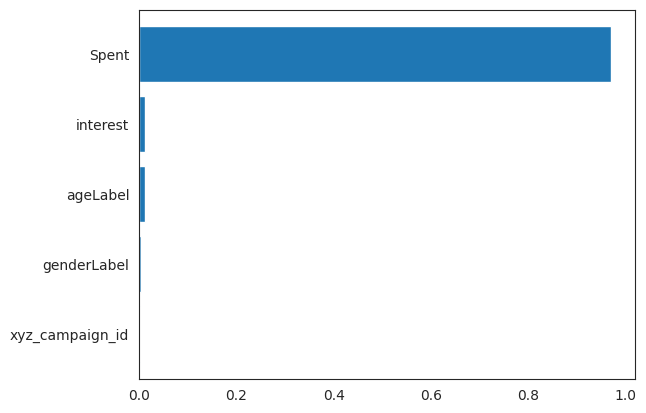

In [ ]:
# Create X (input features) and y (target variable) arrays
X = train_df[features]
y = train_df['Impressions']

# Create an instance of the RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# plot feature importance
plotFeatures(importances)

On Clicks

Feature importances:
Feature: xyz_campaign_id, Score: 0.00004
Feature: ageLabel, Score: 0.00090
Feature: interest, Score: 0.00208
Feature: genderLabel, Score: 0.00316
Feature: Spent, Score: 0.99381


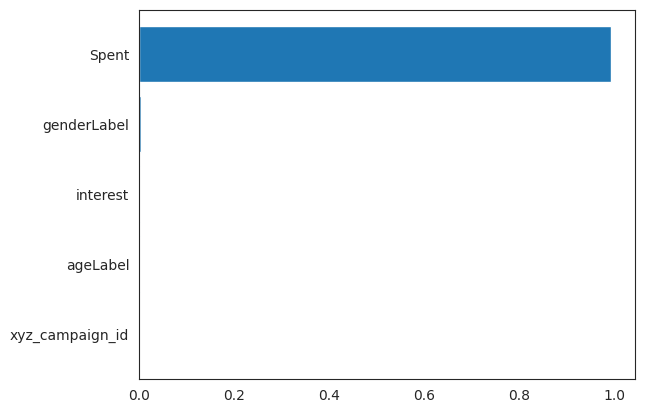

In [ ]:
# Create X (input features) and y (target variable) arrays
X = train_df[features]
y = train_df['Clicks']

# Create an instance of the RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# plot feature importance
plotFeatures(importances)

On Total_Conversion

Feature importances:
Feature: xyz_campaign_id, Score: 0.00087
Feature: genderLabel, Score: 0.02716
Feature: interest, Score: 0.11286
Feature: ageLabel, Score: 0.12617
Feature: Spent, Score: 0.73295


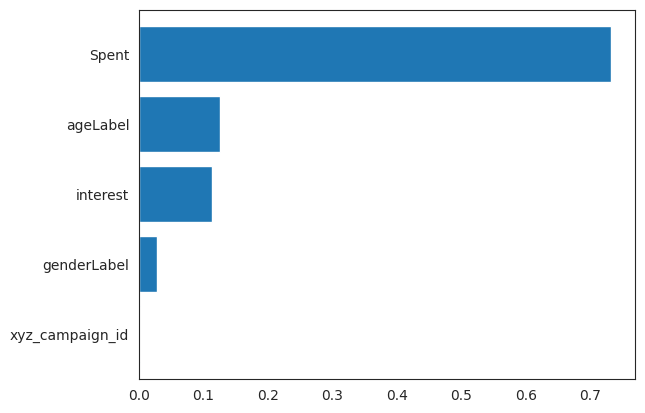

In [ ]:
# Create X (input features) and y (target variable) arrays
X = train_df[features]
y = train_df['Total_Conversion']

# Create an instance of the RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# plot feature importance
plotFeatures(importances)

On Approved Conversion

Feature importances:
Feature: xyz_campaign_id, Score: 0.00465
Feature: genderLabel, Score: 0.03609
Feature: ageLabel, Score: 0.16537
Feature: interest, Score: 0.17118
Feature: Spent, Score: 0.62270


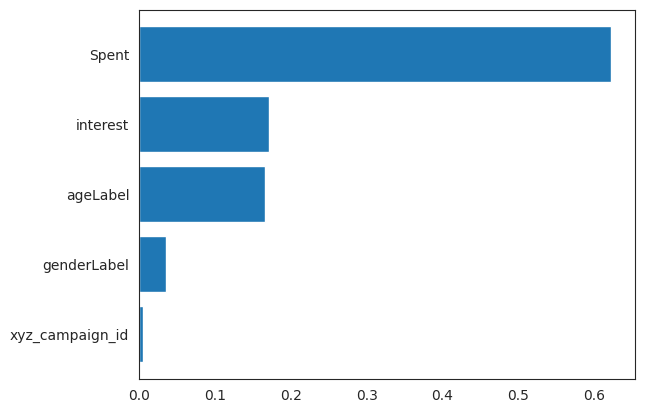

In [ ]:
# Create X (input features) and y (target variable) arrays
X = train_df[features]
y = train_df['Approved_Conversion']

# Create an instance of the RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# plot feature importance
plotFeatures(importances)

In [ ]:
def map_click(setting, budget, predictor):

    # Create a pandas DataFrame with the test data
    test_pd = pd.DataFrame({
        'xyz_campaign_id': [setting['xyz_campaign_id']] * len(budget),
        'ageLabel': [setting['age']] * len(budget),
        'genderLabel': [setting['gender']] * len(budget),
        'interest': [setting['interest']] * len(budget),
        'Spent': budget
    })


    # Prepare the input features
    X_test = test_pd[features]

    # Generate predictions
    predictions = predictor.predict(X_test)
    predictions = np.round(predictions, 0)

    # Create a pandas DataFrame with the predictions
    predictions_pd = pd.DataFrame({'Spent': budget, 'prediction': predictions})

    # Calculate the difference between Spent and prediction
    predictions_pd['difference'] = predictions_pd['Spent'] - predictions_pd['prediction']

    # Plot the predictions
    sns.set_style("white")
    sns.lineplot(data=predictions_pd, x="Spent", y="prediction", color="#bb2649")
    plt.show()

    # Find the row with the maximum difference in predictions
    max_diff_row = predictions_pd.iloc[predictions_pd['prediction'].diff().idxmax()]

    return max_diff_row[['Spent', 'prediction', 'difference']]

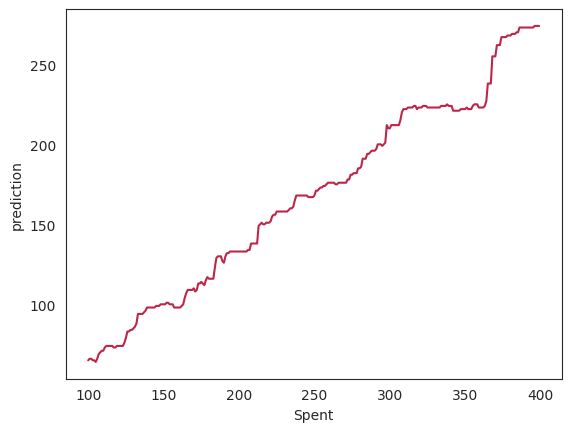

Spent         368.0
prediction    255.0
difference    113.0
Name: 268, dtype: float64


In [ ]:
# Create and fit the RandomForestRegressor model
model = RandomForestRegressor()
X = data[features]
y = data['Clicks']
model.fit(X, y)

setting = {'xyz_campaign_id': 916.0,
           'age': 0.0,
           'gender': 0.0,
           'interest': 15}
budget = [i for i in range(100,400,1)]

# Call the map_click function
result = map_click(setting, budget, model)
print(result)

Feature Engineering

In [ ]:
data['CPC'] = data['Spent'] / data['Clicks']
data['CTR'] = data['Clicks']*100 / data['Impressions']
data['TCR'] = data['Total_Conversion']*100 / data['Impressions']
data['ACR'] = data['Approved_Conversion']*100 / data['Impressions']
data['AR'] = data['Approved_Conversion']*100 / data['Total_Conversion']

In [ ]:
data.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
ageLabel                 int64
genderLabel              int64
CPC                    float64
CTR                    float64
TCR                    float64
ACR                    float64
AR                     float64
dtype: object

In [ ]:
data.CPC.value_counts()

1.480000    5
1.380000    5
1.420000    4
1.290000    4
1.540000    4
           ..
1.771077    1
1.716953    1
1.734000    1
1.605000    1
1.452719    1
Name: CPC, Length: 869, dtype: int64

In [ ]:
fill_value = data['CPC'].mean()
data['CPC'] = data['CPC'].fillna(fill_value)

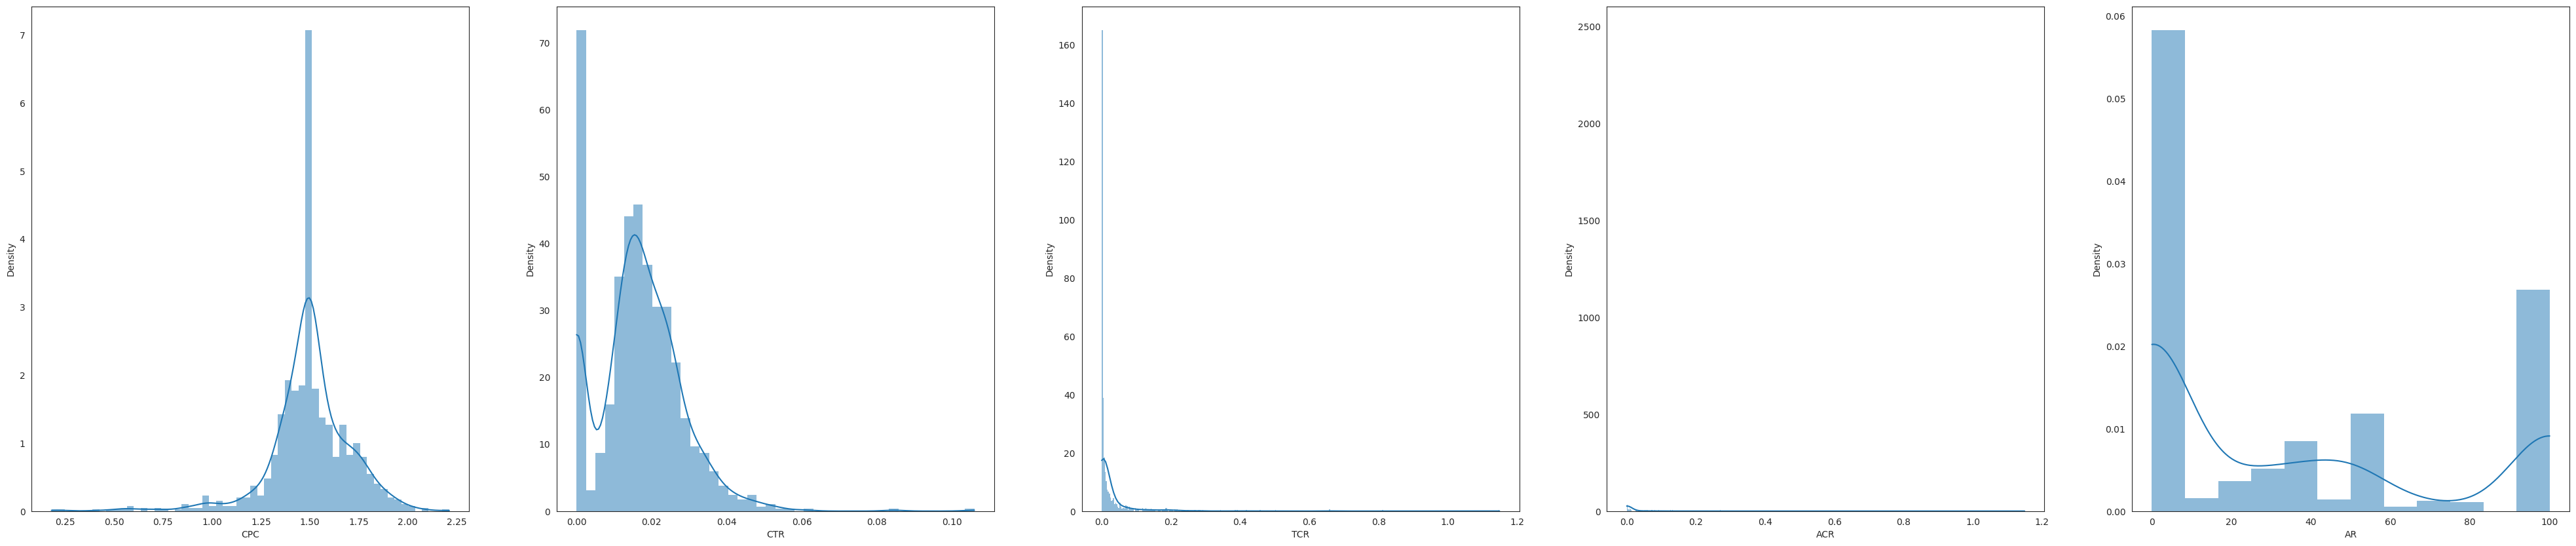

In [ ]:
# EDA
labels = []
i = 0
fig, axs = plt.subplots(1, 5, figsize=(50, 10))
for feat in ['CPC', 'CTR', 'TCR', 'ACR', 'AR']:
  x = data[feat]
  labels.append(feat)
  sns.histplot(data=x, kde=True, stat="density", linewidth=0, ax=axs[i])
  i += 1

In [ ]:
data.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
ageLabel                 int64
genderLabel              int64
CPC                    float64
CTR                    float64
TCR                    float64
ACR                    float64
AR                     float64
sCTR                   float64
sCPC                   float64
dtype: object

Clustering  based on CTR, CPC





In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have a pandas DataFrame named 'data' with columns 'CTR' and 'CPC'

# Scale the 'CTR' column
scaler = StandardScaler()
data['sCTR'] = scaler.fit_transform(data['CTR'].values.reshape(-1, 1))

# Scale the 'CPC' column
scaler = StandardScaler()
data['sCPC'] = scaler.fit_transform(data['CPC'].values.reshape(-1, 1))
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

i = 2, Silhouette Score: 0.4011683430071745
i = 3, Silhouette Score: 0.41710727958896804
i = 4, Silhouette Score: 0.45542614991652175
i = 5, Silhouette Score: 0.4743248682702777
i = 6, Silhouette Score: 0.48320541706179626
i = 7, Silhouette Score: 0.42887648471807965
i = 8, Silhouette Score: 0.4505516616228895
i = 9, Silhouette Score: 0.45269212036899703


Text(0, 0.5, 'score')

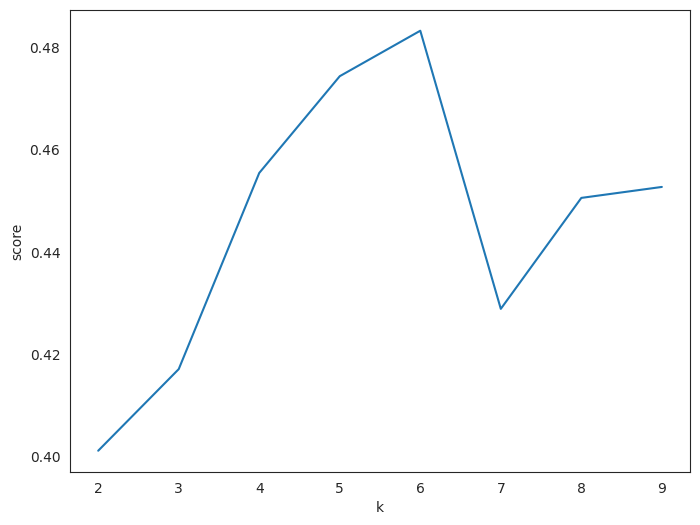

In [ ]:
score = []
for i in range(2,10):

    kmean = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(train_df[['sCTR','sCPC']])
    # Assign cluster labels to the data
    labels = kmean.labels_
    train_df['pred1'] = labels

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(train_df[['sCTR','sCPC']], labels)
    score.append(silhouette_avg)

    print(f"i = {i}, Silhouette Score:",silhouette_avg)

#Visualizing the silhouette scores in a plot
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),score)
ax.set_xlabel("k")
ax.set_ylabel("score")


In [ ]:
kmean = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(train_df[['sCTR','sCPC']])
# Assign cluster labels to the data
labels = kmean.labels_
train_df['pred1'] = labels

# Calculate the silhouette score
silhouette_avg = silhouette_score(train_df[['sCTR','sCPC']], labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.48320541706179626


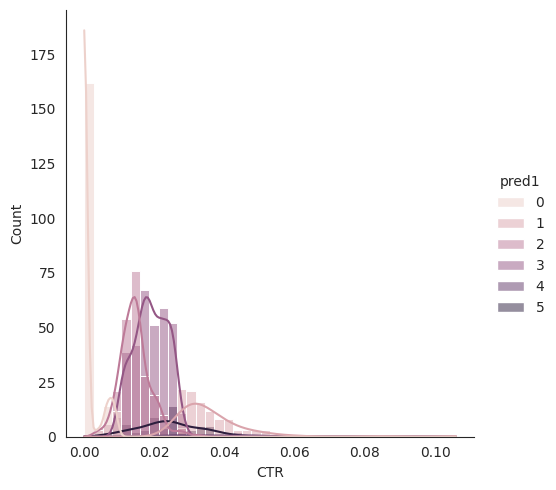

In [ ]:
sns.displot(data=train_df[['CTR', 'pred1']], x='CTR', kde=True, hue='pred1')

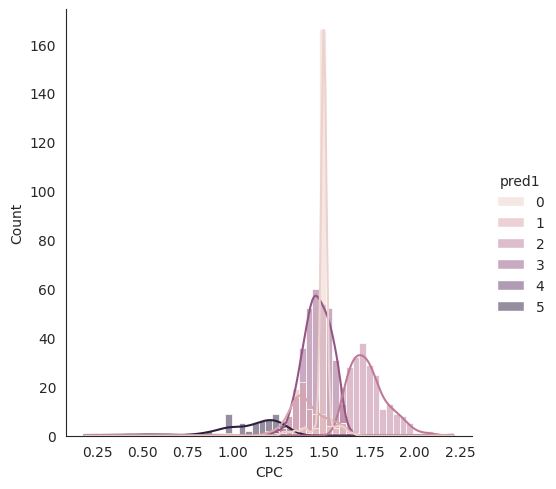

In [ ]:
sns.displot(data=train_df[['CPC', 'pred1']], x='CPC', kde=True, hue='pred1')

Clustering  based on AR

In [ ]:
data_AR = data.dropna(subset=["AR"])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Scale the 'CTR' column
scaler = StandardScaler()
data_AR['sAR'] = scaler.fit_transform(data_AR['AR'].values.reshape(-1, 1))
train_df_ar, test_df_ar = train_test_split(data_AR, test_size=0.2, random_state=42)

<ipython-input-368-90aa79f507a2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_AR['sAR'] = scaler.fit_transform(data_AR['AR'].values.reshape(-1, 1))


In [ ]:
data_AR

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,...,ageLabel,genderLabel,CPC,CTR,TCR,ACR,AR,sCTR,sCPC,sAR
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,...,0,1,1.430000,0.013605,0.027211,0.013605,50.000000,-0.244702,-0.329244,0.400920
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,...,0,1,0.910000,0.011198,0.011198,0.000000,0.000000,-0.454070,-2.798072,-0.844791
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,...,0,1,1.499347,0.000000,0.144300,0.000000,0.000000,-1.427719,0.000000,-0.844791
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,...,0,1,1.250000,0.023480,0.023480,0.000000,0.000000,0.613881,-1.183838,-0.844791
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,...,0,1,1.290000,0.024195,0.024195,0.024195,100.000000,0.676122,-0.993929,1.646630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,...,3,0,1.421389,0.022305,0.001151,0.000177,15.384615,0.511771,-0.370128,-0.461495
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,...,3,0,1.449000,0.018822,0.000471,0.000000,0.000000,0.208894,-0.239037,-0.844791
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,...,3,0,1.438929,0.018478,0.001320,0.000000,0.000000,0.178981,-0.286854,-0.844791
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,...,3,0,1.471926,0.017083,0.001012,0.000253,25.000000,0.057689,-0.130190,-0.221936


i = 2, Elbow Score: 165.65371232686422
i = 3, Elbow Score: 27.948853001887166
i = 4, Elbow Score: 10.317062544822942
i = 5, Elbow Score: 5.685684449372044
i = 6, Elbow Score: 2.5927824500763266
i = 7, Elbow Score: 1.9413499199319428
i = 8, Elbow Score: 1.2494599929453236
i = 9, Elbow Score: 0.7588794291911791


Text(0, 0.5, 'score')

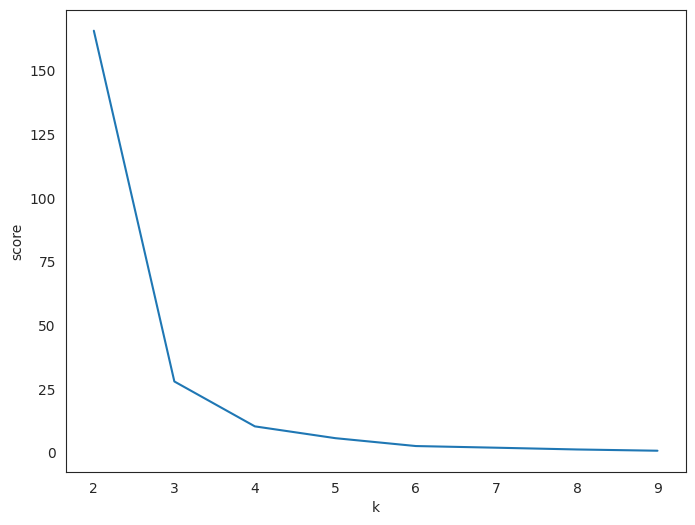

In [ ]:
score = []
for i in range(2,10):

    kmean = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(train_df_ar[['sAR']])
    # Assign cluster labels to the data
    labels = kmean.labels_

    train_df_ar['pred2'] = labels

    # Calculate the silhouette score
    # silhouette_avg = silhouette_score(train_df_ar[['sAR']], labels)
    elbow = kmean.inertia_
    score.append(elbow)

    print(f"i = {i}, Elbow Score:",elbow)

#Visualizing the silhouette scores in a plot
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),score)
ax.set_xlabel("k")
ax.set_ylabel("score")


In [ ]:
kmean = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(train_df_ar[['sAR']])
# Assign cluster labels to the data
labels = kmean.labels_

train_df_ar['pred2'] = labels

# Calculate the silhouette score
silhouette_avg = silhouette_score(train_df_ar[['sAR']], labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8531996009211966


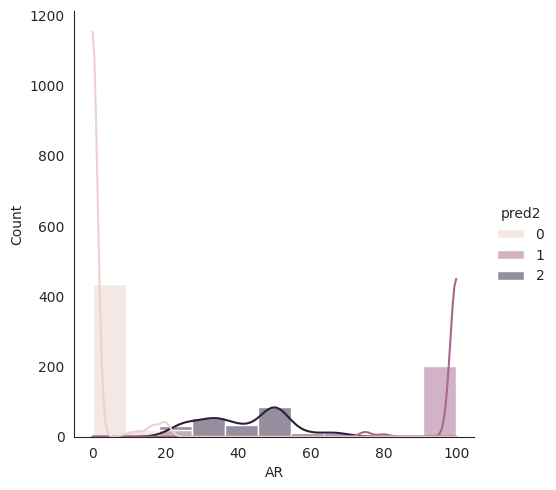

In [ ]:
sns.displot(data=train_df_ar[['AR', 'pred2']], x='AR', kde=True, hue='pred2')

Hypothesis testing


In [ ]:
data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ageLabel,genderLabel,CPC,CTR,TCR,ACR,AR,sCTR,sCPC
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0,1,1.430000,0.013605,0.027211,0.013605,50.000000,-0.244702,-0.329244
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0,1,0.910000,0.011198,0.011198,0.000000,0.000000,-0.454070,-2.798072
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0,1,1.499347,0.000000,0.144300,0.000000,0.000000,-1.427719,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0,1,1.250000,0.023480,0.023480,0.000000,0.000000,0.613881,-1.183838
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0,1,1.290000,0.024195,0.024195,0.024195,100.000000,0.676122,-0.993929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,3,0,1.421389,0.022305,0.001151,0.000177,15.384615,0.511771,-0.370128
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,3,0,1.449000,0.018822,0.000471,0.000000,0.000000,0.208894,-0.239037
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,3,0,1.438929,0.018478,0.001320,0.000000,0.000000,0.178981,-0.286854
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,3,0,1.471926,0.017083,0.001012,0.000253,25.000000,0.057689,-0.130190


In [ ]:
from scipy.stats import t
from math import sqrt
import pandas as pd

def hypoTest(df, feature, input, test_col):
    samples_1 = df[df[feature] == input[0]]
    samples_2 = df[df[feature] == input[1]]

    mean_1 = samples_1[test_col].mean()
    var_1 = samples_1[test_col].var()
    count_1 = samples_1[test_col].count()

    mean_2 = samples_2[test_col].mean()
    var_2 = samples_2[test_col].var()
    count_2 = samples_2[test_col].count()

    numerator = mean_1 - mean_2
    denominator = sqrt((var_1 / count_1) + (var_2 / count_2))
    t_test_statistic = numerator / denominator

    degrees_of_freedom = count_1 + count_2 - 2
    p_value = 1 - t.cdf(t_test_statistic, df=degrees_of_freedom)

    print("Probability that the two have the same distribution:", p_value > 0.05)


In [ ]:
hypoTest(data, 'age', ['30-34', '35-39'], 'TCR')

Probability that the two have the same distribution: False
